In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import torch


In [2]:
def f_angle_igso3(omega, t, eps=1e-4, L=1024):
    """
    with 1-cos(w)/pi
    Args:
        omega: 
        t:  sigma^2
        eps: 
        L: 

    Returns:

    """
    ls = torch.arange(L)[None, :] # [1, L]
    a = torch.sin(omega[:, None] * (ls + 1/2) + (ls + 1/2) * 1e-6) / torch.sin(omega[:, None] / 2 + 1/2*1e-6)
    c = ((1 - torch.cos(omega[:, None])) / math.pi)
    f = c * (2 * ls + 1) * torch.exp(-1/2 * ls * (ls + 1) * t**2) * a  
    f = f.sum(dim=-1) + eps 
    return f 


def f_igso3(omega, t, eps=1e-4, L=200):
    """Truncated sum of IGSO(3) distribution.
    """
    ls = torch.arange(L)[None,:]  # of shape [1, L]

    a = torch.sin(omega[:, None]*(ls+1/2)  + (ls+1/2)*1e-6) / torch.sin(omega[:, None]/2 + 1/2*1e-6)
    c = (1 - torch.cos(omega[:, None])) / math.pi  # (N, *)
    f = (2*ls + 1) * torch.exp(-1/2*ls*(ls+1)*t**2) * a
    
    f = f.sum(dim=-1) + eps
    # print("f shape", f.shape)
    return f

def f_gaussian(x, std):
    y = np.exp(-.5 * x**2 / (std)**2)
    y = y
    return y

def f_maxwell_gaussian(x,std):
    y = x**2*np.exp(-.5 * x**2 / (std)**2)
    return y


axs [<Axes: > <Axes: > <Axes: >]
index 0
fig_index 0
index 49
fig_index 1
index 99
fig_index 2


/tmp/ipykernel_281341/2790865148.py:40: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = x**2*np.exp(-.5 * x**2 / (std)**2)


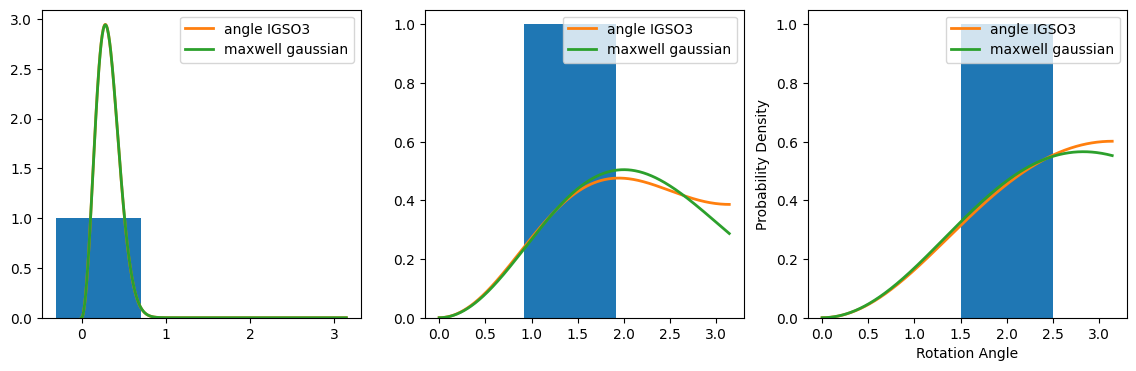

In [10]:
std_dev = torch.tensor([0.2]*100)
std_all = torch.tensor([torch.sqrt(torch.sum(std_dev[:index+1]**2)) for index in range(len(std_dev))])

# make plots
fig_index = 0
f, axs = plt.subplots(1, 3, figsize=(14, 4))
axs = axs.ravel()
print("axs",axs)
for index in [int(i) for i in np.linspace(0,len(std_all)-1,3)]:
    print("index",index)
    print("fig_index",fig_index)
    std = std_all[index] 
    xlist = torch.linspace(0,math.pi,500)

    zlist = f_angle_igso3(xlist, std)
    zlist = zlist/(zlist.sum()*(math.pi/500))

    wlist = f_maxwell_gaussian(xlist, std)
    wlist = wlist/(wlist.sum()*(math.pi/500))

    # Plot histogram
    axs[fig_index].hist(angles_list[index], bins='auto', density=True)

    axs[fig_index].plot(xlist[:], zlist[:], linewidth=2, label='angle IGSO3')
    axs[fig_index].plot(xlist[:], wlist[:], linewidth=2, label='maxwell gaussian')
    plt.xlabel("Rotation Angle")
    plt.ylabel("Probability Density")
    axs[fig_index].legend()
    fig_index += 1
    # plt.show()
# plt.title("Histogram of Rotation Angles")

In [7]:
angles_list = np.array([0.2000, 0.2828, 0.3464, 0.4000, 0.4472, 0.4899, 0.5292, 0.5657, 0.6000,
        0.6325, 0.6633, 0.6928, 0.7211, 0.7483, 0.7746, 0.8000, 0.8246, 0.8485,
        0.8718, 0.8944, 0.9165, 0.9381, 0.9592, 0.9798, 1.0000, 1.0198, 1.0392,
        1.0583, 1.0770, 1.0954, 1.1136, 1.1314, 1.1489, 1.1662, 1.1832, 1.2000,
        1.2166, 1.2329, 1.2490, 1.2649, 1.2806, 1.2961, 1.3115, 1.3267, 1.3416,
        1.3565, 1.3711, 1.3856, 1.4000, 1.4142, 1.4283, 1.4422, 1.4560, 1.4697,
        1.4832, 1.4967, 1.5100, 1.5232, 1.5362, 1.5492, 1.5620, 1.5748, 1.5875,
        1.6000, 1.6125, 1.6248, 1.6371, 1.6492, 1.6613, 1.6733, 1.6852, 1.6971,
        1.7088, 1.7205, 1.7321, 1.7436, 1.7550, 1.7664, 1.7776, 1.7889, 1.8000,
        1.8111, 1.8221, 1.8330, 1.8439, 1.8547, 1.8655, 1.8762, 1.8868, 1.8974,
        1.9079, 1.9183, 1.9287, 1.9391, 1.9494, 1.9596, 1.9698, 1.9799, 1.9900,
        2.0000])

In [2]:
a = torch.arange(10)

In [3]:
a.shape

torch.Size([10])

In [5]:
a[None].shape

torch.Size([1, 10])

In [6]:
a[...None]

SyntaxError: invalid syntax (97278106.py, line 1)